In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import os

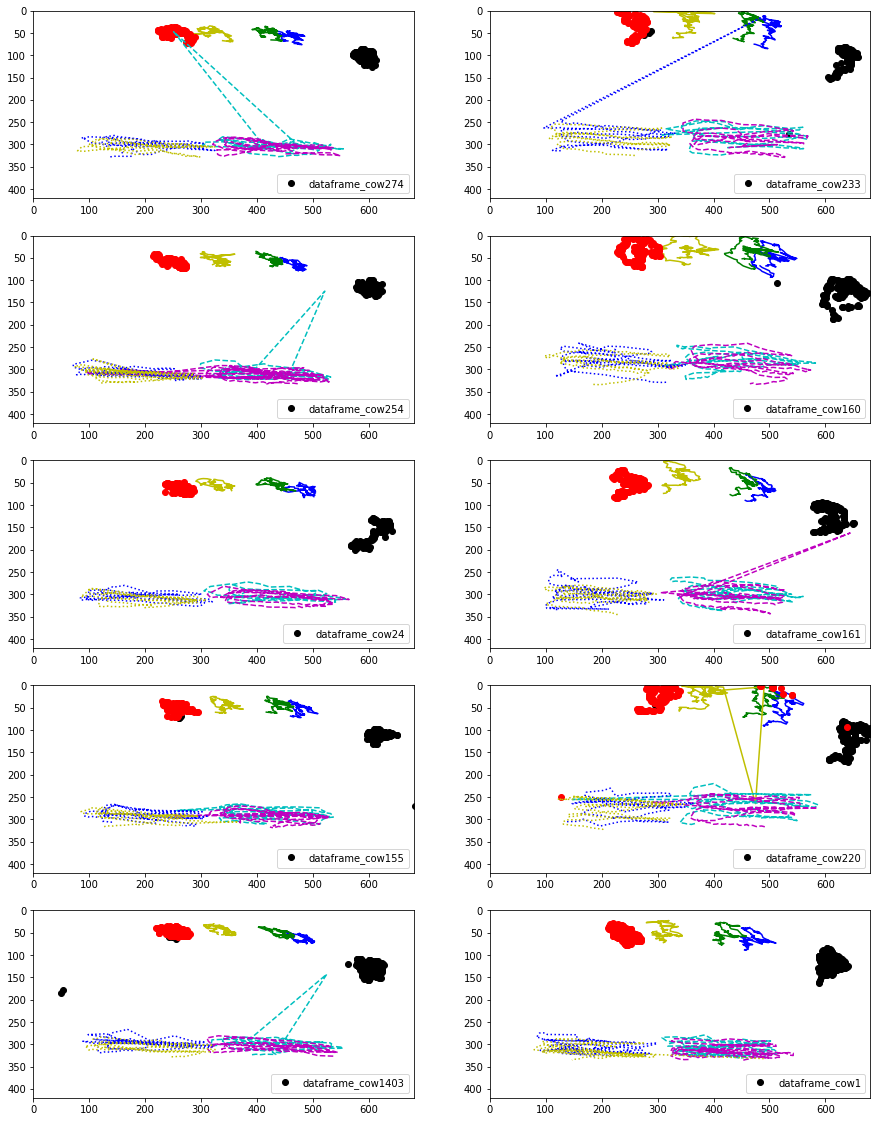

In [41]:
plt.figure(figsize=(15,20))

for i, cow in enumerate(datafiles):
    
    head = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['head']
    withers = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['withers']
    back1 = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back1']
    back2 = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back2']
    back3 = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back3']
    hoofFL = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofFL']
    hoofFR = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofFR']
    hoofHL = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofHL']
    hoofHR = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofHR']

    plt.subplot(5, 2, i+1)
    plt.plot(head['x'].values, head['y'].values, 'ko', label='%s' % cow)
    plt.plot(withers['x'].values, withers['y'].values, 'b')
    plt.plot(back1['x'].values, back1['y'].values, 'g')
    plt.plot(back2['x'].values, back2['y'].values, 'y')
    plt.plot(back3['x'].values, back3['y'].values, 'ro')
    
    plt.plot(hoofFL['x'].values, hoofFL['y'].values, 'c--')
    plt.plot(hoofFR['x'].values, hoofFR['y'].values, 'm--')
    plt.plot(hoofHL['x'].values, hoofHL['y'].values, 'b:')
    plt.plot(hoofHR['x'].values, hoofHR['y'].values, 'y:')
    plt.axis([0, 680, 0, 420])
    plt.gca().invert_yaxis()
    plt.legend(loc=4)

In [2]:
def points2radius(p1, p2, p3):
    a = np.linalg.norm(p3 - p2)
    b = np.linalg.norm(p3 - p1)
    c = np.linalg.norm(p2 - p1)
    s = (a + b + c) / 2
    return a*b*c / 4 / np.sqrt(s * (s - a) * (s - b) * (s - c))

def vec2angle(v1, v2):
    return np.degrees(np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))))

R of cow274 =  2902.280420553735
theta of cow274 =  19.72334828000127

R of cow233 =  796.1888789269935
theta of cow233 =  27.87439923409588

R of cow254 =  1829.1012785935973
theta of cow254 =  21.277829271113514

R of cow160 =  1033.034170470077
theta of cow160 =  31.771726038325024

R of cow24 =  917.1370526414952
theta of cow24 =  35.85629012819048

R of cow161 =  379.1478584962007
theta of cow161 =  30.237824159826502

R of cow155 =  799.0939281853766
theta of cow155 =  25.2274681932052

R of cow220 =  575.5660162218327
theta of cow220 =  33.64752836576916

R of cow1403 =  754.0671828192454
theta of cow1403 =  30.854833936074495

R of cow1 =  744.8595481709639
theta of cow1 =  22.83453054585403



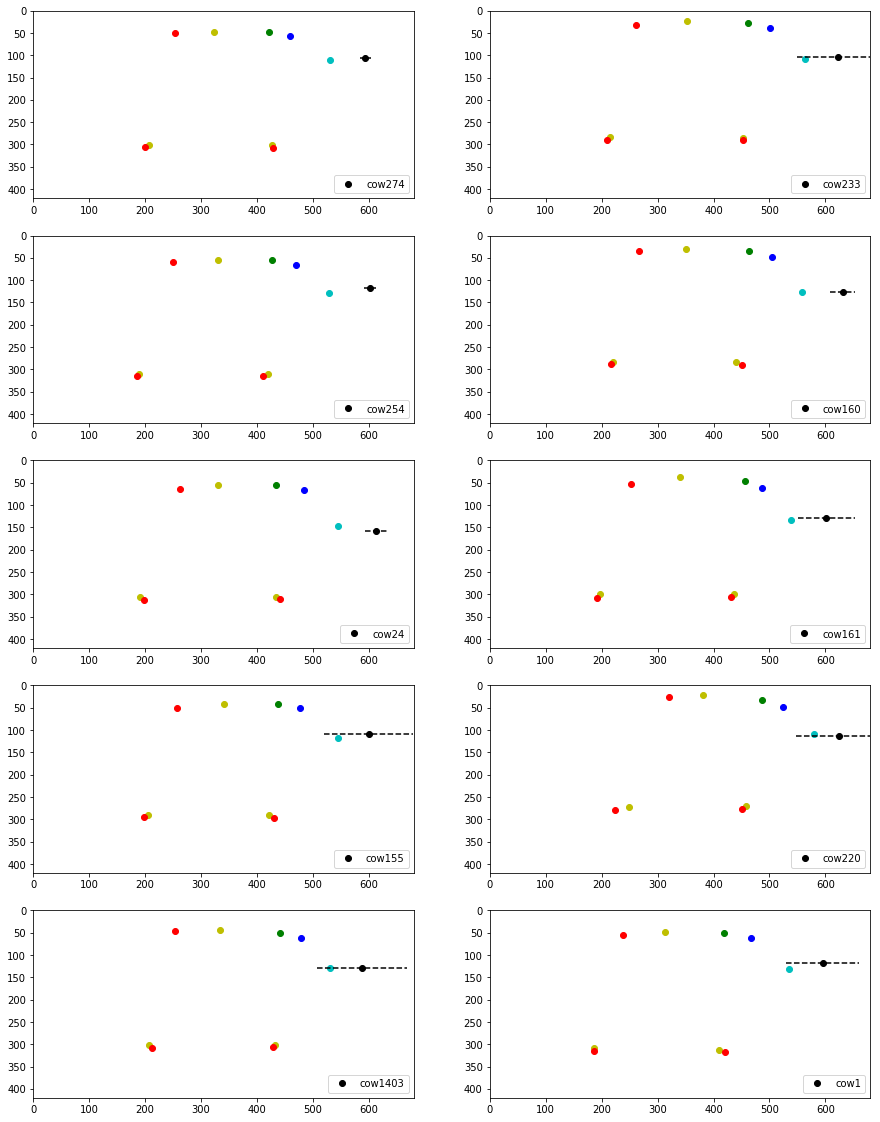

In [40]:
plt.figure(figsize=(15,20))

for i, cow in enumerate(datafiles):
    
    start = cow.find('_') + 1
    cow_id = cow[start:]
    
    head = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['head']
    neck = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['neck']
    withers = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['withers']
    back1 = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back1']
    back2 = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back2']
    back3 = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back3']
    hoofFL = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofFL']
    hoofFR = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofFR']
    hoofHL = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofHL']
    hoofHR = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofHR']
    
    # means
    head_mean = np.mean((head['x'].values, head['y'].values), axis=1)
    neck_mean = np.mean((neck['x'].values, neck['y'].values), axis=1)
    withers_mean = np.mean((withers['x'].values, withers['y'].values), axis=1)
    back1_mean = np.mean((back1['x'].values, back1['y'].values), axis=1)
    back2_mean = np.mean((back2['x'].values, back2['y'].values), axis=1)
    back3_mean = np.mean((back3['x'].values, back3['y'].values), axis=1)
    hoofFL_mean = np.mean((hoofFL['x'].values, hoofFL['y'].values), axis=1)
    hoofFR_mean = np.mean((hoofFR['x'].values, hoofFR['y'].values), axis=1)
    hoofHL_mean = np.mean((hoofHL['x'].values, hoofHL['y'].values), axis=1)
    hoofHR_mean = np.mean((hoofHR['x'].values, hoofHR['y'].values), axis=1)
    
    # standard deviations
    head_std = np.std((head['x'].values, head['y'].values), axis=1)
    
    # radius of back
    print('R of {} = '.format(cow_id), points2radius(back1_mean, back2_mean, back3_mean))
    print('theta of {} = '.format(cow_id), vec2angle(withers_mean - head_mean, hoofHL_mean - hoofFL_mean))
    #print('theta of {} = '.format(cow_id), vec2angle(neck_mean - head_mean, hoofHL_mean - hoofFL_mean))
    print()

    plt.subplot(5, 2, i+1)
    plt.plot(head_mean[0], head_mean[1], 'ko', label='%s' % cow_id)
    plt.plot(neck_mean[0], neck_mean[1], 'co')
    plt.plot(withers_mean[0], withers_mean[1], 'bo')
    plt.plot(back1_mean[0], back1_mean[1], 'go')
    plt.plot(back2_mean[0], back2_mean[1], 'yo')
    plt.plot(back3_mean[0], back3_mean[1], 'ro')
    plt.plot(hoofFL_mean[0], hoofFL_mean[1], 'yo')
    plt.plot(hoofFR_mean[0], hoofFR_mean[1], 'ro')
    plt.plot(hoofHL_mean[0], hoofHL_mean[1], 'yo')
    plt.plot(hoofHR_mean[0], hoofHR_mean[1], 'ro')
    
    plt.plot([head_mean[0] - head_std[0], head_mean[0] + head_std[0]], [head_mean[1], head_mean[1]], 'k--')

    plt.axis([0, 680, 0, 420])
    plt.gca().invert_yaxis()
    plt.legend(loc=4)

## Support vector regression

In [47]:
subfolders = ['data/Tag1', 'data/Tag4', 'data/Tag5', 'data/Tag6', 'data/Tag7', 'data/Tag14']
subdirs = [x[0] for x in os.walk('data')]   
files = []
datafiles = {}
X = np.empty((59,1))
features = np.empty([0,7])

for subdir in subfolders: 
    print(subdir)
    for file in os.listdir(subdir):
        if file.endswith(".h5"):
            #print(filename)
            end = file.find('Deep')
            dataframe = 'dataframe_' + file[:end]
            datafiles[dataframe] = pd.read_hdf(subdir + '/' + file)
    
    for i, cow in enumerate(datafiles):
        start = cow.find('_') + 1
        cow_id = cow[start:]
        #print(cow_id)
        
        # bodyparts
        bodyparts = ['head', 'neck', 'withers', 'back1', 'back2', 'back3', 'hoofFL', 'hoofFR', 'hoofHL', 'hoofHR']
        ''' 
        for part, bp in enumerate(bodyparts):
            print(part)
            bp = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000'][bp]
            bp_mean = np.mean((bp['x'].values, bp['y'].values), axis=1)
            X.append(bp_mean)
        '''
        head = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['head']
        neck = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['neck']
        withers = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['withers']
        back1 = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back1']
        back2 = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back2']
        back3 = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back3']
        hoofFL = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofFL']
        hoofFR = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofFR']
        hoofHL = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofHL']
        hoofHR = datafiles[cow]['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['hoofHR']
        
        # Means
        head_mean = np.mean((head['x'].values, head['y'].values), axis=1)
        neck_mean = np.mean((neck['x'].values, neck['y'].values), axis=1)
        withers_mean = np.mean((withers['x'].values, withers['y'].values), axis=1)
        back1_mean = np.mean((back1['x'].values, back1['y'].values), axis=1)
        back2_mean = np.mean((back2['x'].values, back2['y'].values), axis=1)
        back3_mean = np.mean((back3['x'].values, back3['y'].values), axis=1)
        hoofFL_mean = np.mean((hoofFL['x'].values, hoofFL['y'].values), axis=1)
        hoofFR_mean = np.mean((hoofFR['x'].values, hoofFR['y'].values), axis=1)
        hoofHL_mean = np.mean((hoofHL['x'].values, hoofHL['y'].values), axis=1)
        hoofHR_mean = np.mean((hoofHR['x'].values, hoofHR['y'].values), axis=1)
        
        # standard deviations
        head_std = np.std((head['x'].values, head['y'].values), axis=1)
        neck_std = np.std((neck['x'].values, neck['y'].values), axis=1)
        withers_std = np.std((withers['x'].values, withers['y'].values), axis=1)
        back1_std = np.std((back1['x'].values, back1['y'].values), axis=1)
        back2_std = np.std((back2['x'].values, back2['y'].values), axis=1)
        back3_std = np.std((back3['x'].values, back3['y'].values), axis=1)
        hoofFL_std = np.std((hoofFL['x'].values, hoofFL['y'].values), axis=1)
        hoofFR_std = np.std((hoofFR['x'].values, hoofFR['y'].values), axis=1)
        hoofHL_std = np.std((hoofHL['x'].values, hoofHL['y'].values), axis=1)
        hoofHR_std = np.std((hoofHR['x'].values, hoofHR['y'].values), axis=1)
        
        # Features
        R = points2radius(back1_mean, back2_mean, back3_mean)
        theta = vec2angle(withers_mean - head_mean, hoofHL_mean - hoofFL_mean)
        #head std
        head_shaking = head_std[1] / withers_std[1]
        #hoofves std *4
        hoofFL_step = hoofFL_std[0] / withers_std[0]
        hoofFR_step = hoofFR_std[0] / withers_std[0]
        hoofHL_step = hoofHL_std[0] / withers_std[0]
        hoofHR_step = hoofHR_std[0] / withers_std[0]
        
        features = np.vstack((features, np.array([R, theta, head_shaking, hoofFL_step, 
                                                  hoofFR_step, hoofHL_step, hoofHR_step])))
        
        
        
        #X = np.append(X, head_mean)
        #X = np.hstack((X, head_mean))
        #X = np.vstack((X, R))
        
    datafiles = {}

print(features.shape)
#print(np.array(X).shape)

data/Tag1
data/Tag4
data/Tag5
data/Tag6
data/Tag7
data/Tag14
(59, 7)


In [63]:
np.array(features)

array([[7.44859548e+02, 2.28345305e+01, 1.41613729e+00, 4.28916590e+00,
        4.64868342e+00, 4.24759928e+00, 4.85214385e+00],
       [5.75566016e+02, 3.36475284e+01, 1.44624991e+00, 4.66565197e+00,
        3.93449022e+00, 3.79967573e+00, 4.04478677e+00],
       [3.79147858e+02, 3.02378242e+01, 1.59030598e+00, 5.38121851e+00,
        4.87435754e+00, 5.00760434e+00, 4.73375918e+00],
       [1.03303417e+03, 3.17717260e+01, 1.14673923e+00, 3.31485715e+00,
        3.44642538e+00, 3.44087296e+00, 3.32579385e+00],
       [7.99093928e+02, 2.52274682e+01, 1.89991430e+00, 5.12681681e+00,
        5.06384817e+00, 5.21349607e+00, 5.18007358e+00],
       [2.90228042e+03, 1.97233483e+01, 1.35820444e+00, 4.97765620e+00,
        4.85359077e+00, 4.53897623e+00, 4.94356847e+00],
       [1.82910128e+03, 2.12778293e+01, 1.05208739e+00, 5.14613538e+00,
        6.88634501e+00, 5.27396356e+00, 5.06904350e+00],
       [7.54067183e+02, 3.08548339e+01, 2.27158649e+00, 4.63030682e+00,
        4.97945235e+00, 4

In [57]:
X = features
y = np.array([4.0, 4.0, 3.86, 2.14, 2.14, 2.0, 1.0, 4.0, 2.14,  2.14,  
              4.0, 4.0, 3.43, 2.57, 2.57, 2.0, 1.0, 4.0, 2.57, 2.57,
              4.0, 4.0, 3.29, 2.71, 2.71, 2.0, 1.0, 4.0, 2.71, 2.71, 
              4.0, 4.0, 3.14, 2.86, 2.86, 2.0, 1.0, 4.0, 2.86, 2.86,
              4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 1.0, 4.0, 3.0, 3.0,
              4.0, 5.0, 4.0, 3.0, 4.0, 1.0, 1.0, 4.0, 3.0]).reshape(59,1)
print(X.shape, y.shape)

(59, 7) (59, 1)


## Data training using SVR

In [58]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# Feature scaling
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

print(X_train.shape)

(53, 7)


In [59]:
print(X_train[0:10,:])

[[-1.47161190e-01 -5.17421940e-01 -4.56318922e-01  4.67091090e-01
   7.09202649e-01  4.02416848e-01  8.61404092e-01]
 [-2.46624697e-01 -3.39378291e-01 -4.12785749e-01  2.11059077e+00
   1.59578163e+00  2.21169188e+00  2.09018307e+00]
 [ 2.20831168e-01 -7.12010268e-02 -6.51144916e-01  4.90330700e-01
   4.70873421e-01  2.32137834e-01  2.62859410e-01]
 [ 1.88280686e+00 -2.00881546e-01 -6.90269587e-01 -5.45508710e-01
  -5.90520195e-01 -7.06714778e-01 -7.75593484e-01]
 [ 9.06995329e-02 -6.64239997e-01 -7.94753016e-01 -5.65325076e-01
  -2.50977491e-01 -5.98360905e-01 -5.14218851e-01]
 [ 1.18808926e+00 -1.98035418e-01  4.62826082e-01  1.64039971e-01
  -2.05434915e-03  2.30472433e-01  1.45359554e-01]
 [-3.27913352e-01 -1.89653698e-01 -7.81699621e-01 -5.47506156e-01
  -6.23423847e-01 -8.71401551e-01 -5.19466892e-01]
 [-1.65999950e-01 -2.34088351e-01  1.42302915e+00  6.87031214e-01
   9.23274189e-01  7.81563254e-01  9.31718655e-01]
 [ 1.08208658e-01 -1.96784171e-01  5.84133280e-01  1.21929773e+0

In [60]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=10)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_train)

print('Error: ', svr_rbf.fit(X_train, y_train).score(X_train, y_train))

Error:  0.9906948048433806


/home/mas-19/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
train_results = svr_rbf.predict(X_train)
print(train_results)

[2.23996172 2.24012688 2.8998876  2.09985728 1.10016674 2.10010724
 4.89999674 2.23996202 2.95507056 2.90898032 2.66999448 2.81004066
 3.19003191 3.90002749 3.33016327 2.10010147 3.75999894 2.8102842
 3.90016674 2.80960453 3.90013821 2.92402743 2.8099949  1.10001932
 1.09939052 3.90016327 3.9001594  2.90752869 2.91005652 2.66999907
 3.03979326 1.10010736 2.10002749 2.95652685 3.89979029 1.09993681
 3.90027679 3.89999894 3.90012261 3.89995614 2.90958048 2.9111522
 3.89988212 2.67012688 2.10037915 2.90898032 2.24006964 3.89988761
 3.89985728 3.89939258 3.89988213 2.67003051 1.10013778]


In [62]:
print(y_train.T)

[[2.14 2.14 3.   2.   1.   2.   5.   2.14 3.   3.   2.57 2.71 3.29 4.
  3.43 2.   3.86 2.71 4.   2.71 4.   3.   2.71 1.   1.   4.   4.   3.
  2.86 2.57 3.14 1.   2.   2.86 4.   1.   4.   4.   4.   4.   3.   2.86
  4.   2.57 2.   2.86 2.14 4.   4.   4.   4.   2.57 1.  ]]


In [63]:
test_results = svr_rbf.predict(X_test)
print(test_results)
print

[2.90898032 2.90898148 2.90899489 2.90889799 2.90898032 2.90898085]


<function print>

In [64]:
print(y_test)

[[4.]
 [1.]
 [4.]
 [4.]
 [4.]
 [3.]]


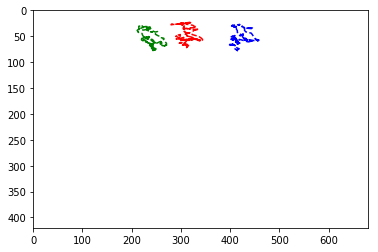

In [39]:
bp_b1 = Dataframe['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back1']
bp_b2 = Dataframe['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back2']
bp_b3 = Dataframe['DeepCut_resnet50_Cow_labelingJan2shuffle1_30000']['back3']

plt.plot(bp_b1['x'].values, bp_b1['y'].values, 'b--')
plt.plot(bp_b2['x'].values, bp_b2['y'].values, 'r--')
plt.plot(bp_b3['x'].values, bp_b3['y'].values, 'g--')
plt.axis([0, 680, 0, 420])
plt.gca().invert_yaxis()